In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
#!unzip "train.csv.zip"

# Context 

In [52]:
#df = pd.read_csv('train.csv')
df = pd.read_csv('https://raw.githubusercontent.com/anton-selitskiy/RSS_ML/main/train.csv')

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [9]:
df.shape

(100000, 12)

### There are 100,000 records and 12 columns.

### Get lists of numerical and non numerical columns:

In [10]:
numeric_col = df.select_dtypes('number').columns
object_col = df.select_dtypes('object').columns
print(f'Numeric: {numeric_col.tolist()},\nNon numeric: {object_col.tolist()}')

Numeric: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],
Non numeric: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


1) PassengerId: index of a person (coinsides with the index of the dataframe)

2) Survived: indicator of the fact of salvation (0/1)

3) Pclass: passenger class (integer/categorical)

4) Name: name of a person (text)

5) Sex: gender (text/categorical)

6) Age: age in years (numeric)

7) SibSp: number of siblings (brother, sister, stepbrother, stepsister)/spouses aboard (integer)

8) Parch: number of parents/children (daughter, son, stepdaughter, stepson) aboard (integer)

9) Ticket: ticket number (text)

10) Fare: ticket ptice (numeric)

11) Cabin: cabin number (text)

12) Embarked: port of embarcation (text)

### The question that we can address is: *What are the factors that were important for salvation?*

# Data quality assessment

## Describe numerical data

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


### Survived and Pclass look like categorical features

In [12]:
df['Survived'].value_counts()

0    57226
1    42774
Name: Survived, dtype: int64

Survived is a binary variable with balanced classes

In [13]:
df['Pclass'].value_counts()

3    41006
1    30315
2    28679
Name: Pclass, dtype: int64

Pclass is a categorical attribute with 3 values

### Missing data in columns Age and Fare

In [14]:
print(f"Missing Age: {df['Age'].isna().sum()}")

Missing Age: 3292


In [15]:
print(f"Missing Fare: {df['Fare'].isna().sum()}")

Missing Fare: 134


In [16]:
print(f"Missing Age and Fare together: {df[df['Age'].isna() & df['Fare'].isna()].shape[0]}")

Missing Age and Fare together: 5


## Describe non numeric data

In [17]:
df[object_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Name      100000 non-null  object
 1   Sex       100000 non-null  object
 2   Ticket    95377 non-null   object
 3   Cabin     32134 non-null   object
 4   Embarked  99750 non-null   object
dtypes: object(5)
memory usage: 3.8+ MB


### Examples of the data and check of missing values

In [18]:
df['Name'].tolist()[:5]

['Oconnor, Frankie',
 'Bryan, Drew',
 'Owens, Kenneth',
 'Kramer, James',
 'Bond, Michael']

0. Name contains first name and last name of the passenger

In [19]:
df['Sex'].value_counts(dropna=False)

male      56114
female    43886
Name: Sex, dtype: int64

1. Sex is a categorical attribute with 2 possible values nerly balanced

In [20]:
df['Ticket'].tolist()[:5]

['209245', '27323', 'CA 457703', 'A. 10866', '427635']

In [21]:
print(f"Missing Ticket: {df['Ticket'].isna().sum()}")

Missing Ticket: 4623


2. Ticket is a text+number data with 4,623 missing values

In [22]:
df['Cabin'].tolist()[5:15]

[nan, nan, nan, 'A7253', 'D2969', nan, 'A9055', 'C8674', nan, 'D6945']

In [23]:
print(f"Missing Cabin: {df['Cabin'].isna().sum()}")

Missing Cabin: 67866


In [24]:
len(df['Cabin'].unique())

26993

3. Cabin is a categorical attribute with 26,993 possible values and 67,866 missing

In [25]:
df['Embarked'].value_counts(dropna=False)

S      72139
C      22187
Q       5424
NaN      250
Name: Embarked, dtype: int64

4. Embarked is a categorical attribute with 3 possible values

# Data exploration

## 1. Exploring each individual variable (excluding PassengerId and Survived)

### Pclass

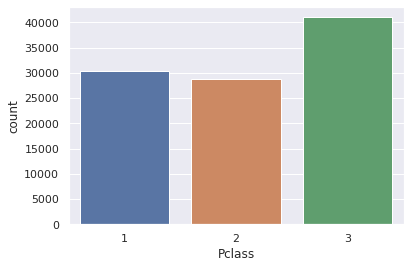

In [26]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Pclass", data=df)

### Age

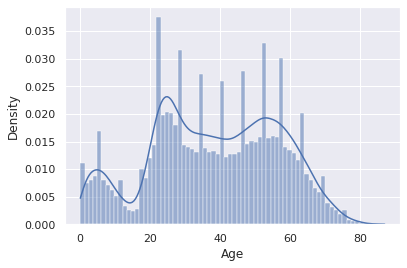

In [27]:
#from locale import normalize
sns.histplot(df['Age'], kde=True, stat="density")

From the analysis above, we know that there are many missing values

### SibSp

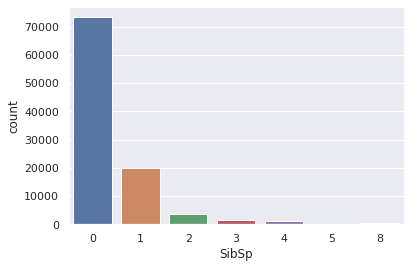

In [28]:
#sns.set_theme(style="darkgrid")
sns.countplot(x="SibSp", data=df)

### Parch

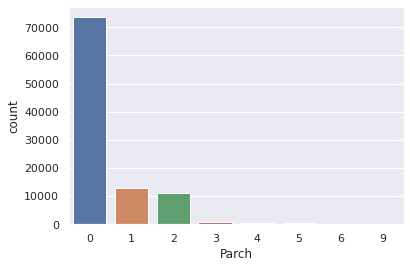

In [29]:
#sns.set_theme(style="darkgrid")
sns.countplot(x="Parch", data=df)

### Fare

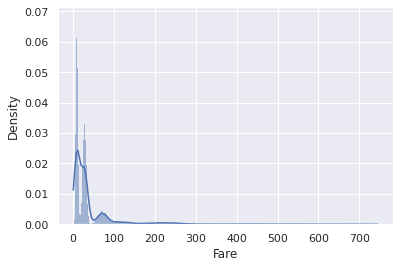

In [30]:
sns.histplot(df['Fare'], kde=True, stat="density")

It looks like Fare has outliers. Also, it has 3 modes that can correspond to 3 classes

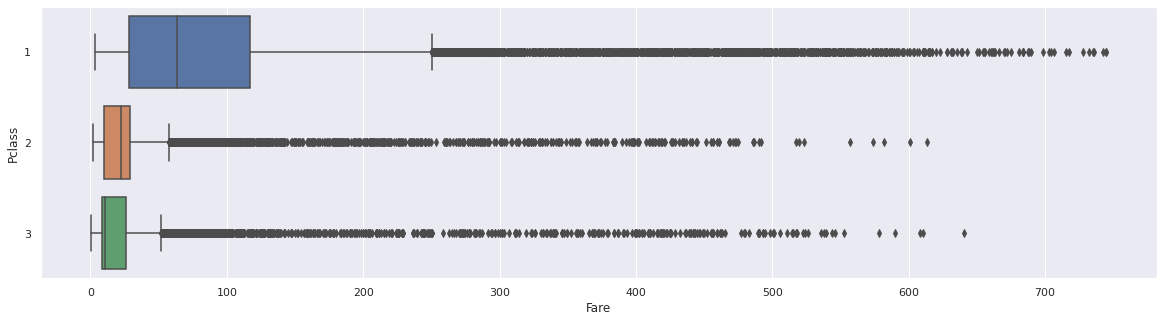

In [31]:
fig, ax = plt.subplots(figsize=(20,5)) 
sns.boxplot(y="Pclass", x="Fare", data=df, orient="h")

The data in this column look suspicious: too many extrem outliers. On the other hand, *we can fill in the missing values* with mean value for the corresponding class.

### Name
This information could be used if we had extra data, for example, to get the age if it is missing or the place of embarking

### Sex

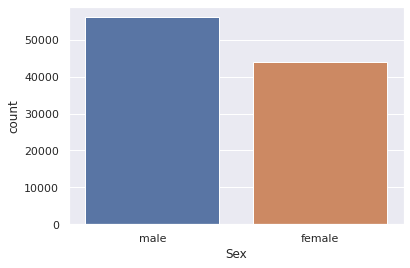

In [32]:
#sns.set_theme(style="darkgrid")
sns.countplot(x="Sex", data=df)

### Ticket
It is difficult to use this column. Probably, it could be used for detecting the missing embarking information.

### Cabin
Too many missing values, it looks like we can't use this column.

### Embarked

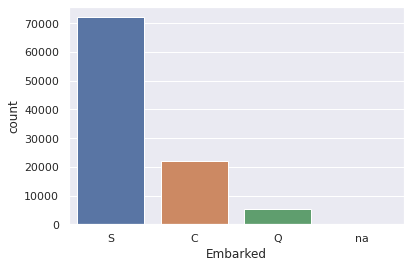

In [33]:
#sns.set_theme(style="darkgrid")
sns.countplot(x="Embarked", data=df.fillna('na'))

## 2. Exploring the relationship between each variable and the target and between variables

Correlation of attributes (excluding PassengerId, Name, Ticket, and Cabin)

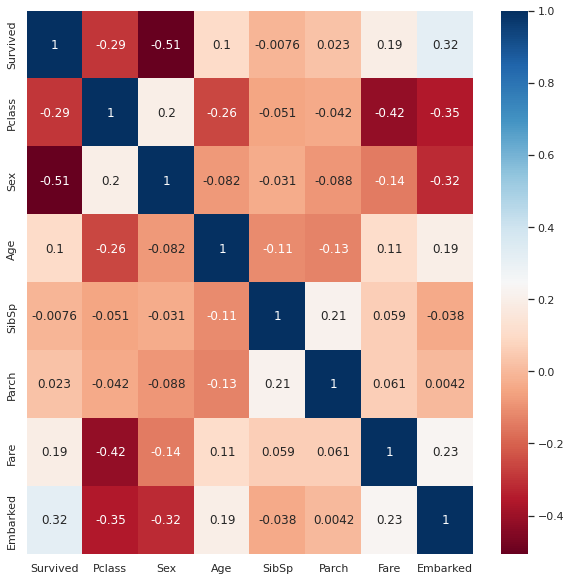

In [34]:
fig, ax = plt.subplots(figsize=(10,10))    
sns.heatmap(df.replace({'Sex': {'male': 1, 'female': 0}, 'Embarked': {'S':0,'C':1, 'Q':2}}).drop(columns='PassengerId').corr(), cmap="RdBu", annot=True)

Fare-Age plot with goups Sex and Pclass

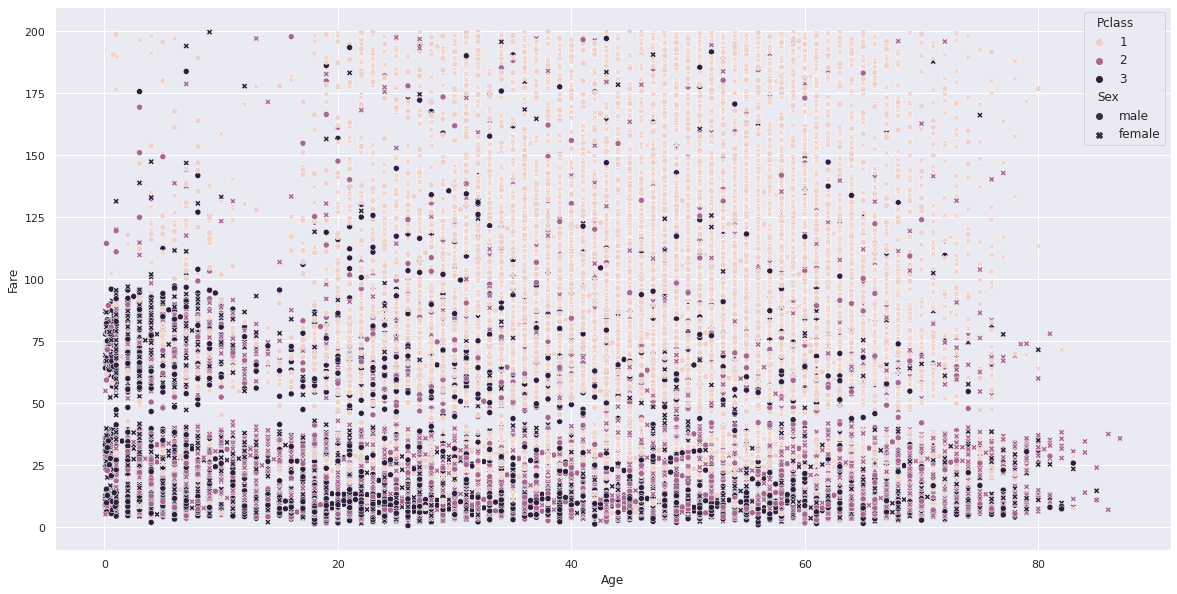

In [35]:
fig, ax = plt.subplots(figsize=(20,10))   
sns.scatterplot(data=df[df['Fare']<200], x='Age', y='Fare', hue='Pclass', style="Sex") 

It looks like the data are noisy, but there are visible boundaries for Fare = 50 and 100. Let's look at the distribution 

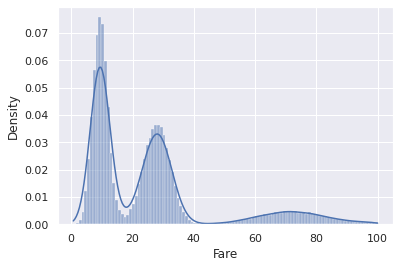

In [36]:
sns.histplot(df[df['Fare']<100]['Fare'], kde=True, stat="density")

These 3 distinct peaks should correspond to the classes (1, 2, and 3).

Dependence on the Sex and Pclass

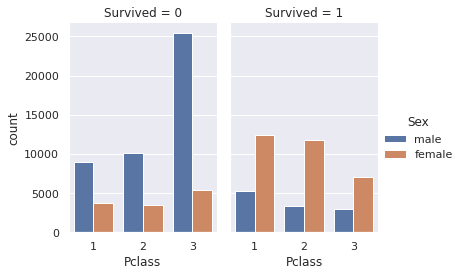

In [37]:
sns.catplot(x="Pclass", hue="Sex", col="Survived", data=df, kind="count", height=4, aspect=.7)

Text(0.5, 1.0, 'Distribution of survived and sink passengers')

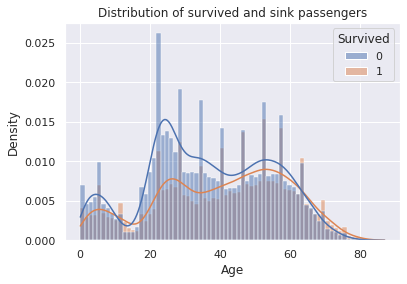

In [53]:
sns.histplot(data=df, x='Age', kde=True, stat="density", hue='Survived')
plt.title('Distribution of survived and sink passengers')

It is noisy data, we can split it into intervals (bins).

Text(0.5, 1.0, 'Distribution of survived and not passengers')

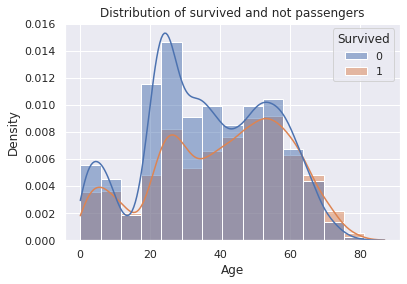

In [39]:
sns.histplot(data=df, x='Age', kde=True, stat="density", hue='Survived', bins=15)
plt.title('Distribution of survived and not passengers')

Text(0.5, 1.0, 'Distribution of survived passengers by gender')

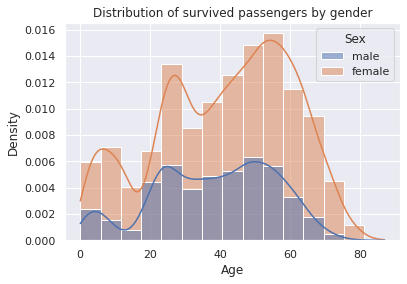

In [40]:
sns.histplot(data=df[df['Survived']==1], x='Age', kde=True, stat="density", hue='Sex', bins=15)
plt.title('Distribution of survived passengers by gender')

In [41]:
df['Age'] = pd.qcut(df['Age'], 15)

In [42]:
from sklearn.preprocessing import OrdinalEncoder
orde = OrdinalEncoder()
df['Age'] = orde.fit_transform(df[['Age']])

Let's split into bins Fare. First, cut the long tail (assing 100 for values grater than 100)

In [43]:
df['Fare'] = df['Fare'].apply(lambda x: 100 if x>100 else x)

In [44]:
df['Fare'] = pd.qcut(df['Fare'], 14, duplicates='drop')

In [45]:
#from sklearn.preprocessing import OrdinalEncoder
#orde = OrdinalEncoder()
df['Fare'] = orde.fit_transform(df[['Fare']])

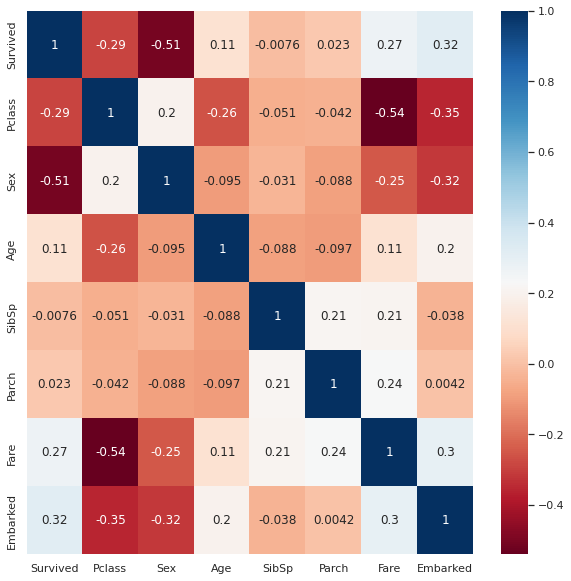

In [46]:
fig, ax = plt.subplots(figsize=(10,10))    
sns.heatmap(df.replace({'Sex': {'male': 1, 'female': 0}, 'Embarked': {'S':0,'C':1, 'Q':2}}).drop(columns='PassengerId').corr(), cmap="RdBu", annot=True)

Dependence on the number of siblings/spouse

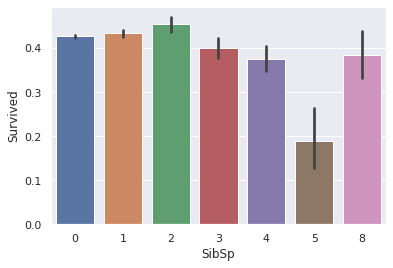

In [48]:
sns.barplot(x='SibSp', y='Survived', data=df)

Dependence on the number of children/parents

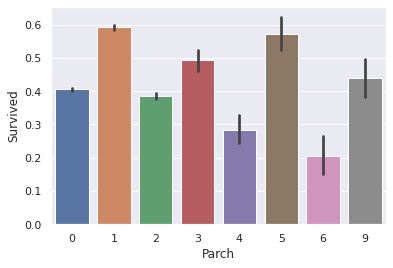

In [49]:
sns.barplot(x='Parch', y='Survived', data=df)

# Summary

We have the following columns:

In [60]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

The **target** column is Survived. Column PassengerId is the **index.** Columns Name, Ticket, and Cabin contain text that is difficult to use for analysis. Therefore, we can use **attributes** Pclass, Sex, Age, SibSp, Parch, Fare, and Embarked.

*Pclass* is categorical (ordinal) with values 1, 2, and 3, where 3 corresponds to the lowest price.

*Sex* is nominal with values 'male' and 'female'. It contains 5 missing values which could be detected form Name or deleted.

*Age* has many missing values that could be filled in from Age distribution of survived people and Age distribution of dead people to fill missing Age of dead passengers.

*SibSp* and *Parch* are categorical columns(more likely, nominal)

*Fare* has high correlation with Pclass, but the values are very spread.

*Embarked* has some missing values that can be deleted.

###Some observations: 
More people died than survived. Among survived passengers, there are more women than men.

###Recommendation: 
Split Age and Fare on bins, because data is noisy.